In [ ]:
# Import pustaka
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [ ]:
# 1. Membuat DataFrame
print("=== Membuat Data ===")
data = {
    "City": ["New York", "Paris", "Berlin", "London", "Paris", "New York"],
    "Temperature": [21, 23, 19, 25, 22, 20],
    "Rainfall": [10, 20, 15, 10, 30, 25],
    "Humidity": [65, 70, 60, 80, 75, 68],
}
df = pd.DataFrame(data)
print(df)

=== Membuat Data ===
       City  Temperature  Rainfall  Humidity
0  New York           21        10        65
1     Paris           23        20        70
2    Berlin           19        15        60
3    London           25        10        80
4     Paris           22        30        75
5  New York           20        25        68


Hasil output menunjukkan pembuatan sebuah DataFrame menggunakan pustaka pandas, yang merupakan struktur data tabular dengan kolom bernama dan baris terindeks. Data yang dimasukkan berisi informasi terkait kota, suhu (Temperature), curah hujan (Rainfall), dan kelembaban (Humidity). Setiap kolom mewakili atribut tertentu, dan setiap baris mewakili data untuk sebuah kota. Misalnya, baris pertama menunjukkan data untuk kota New York dengan suhu 21, curah hujan 10, dan kelembaban 65.

DataFrame ini memungkinkan manipulasi data yang efisien, seperti pengambilan subset data, perhitungan statistik, atau visualisasi data. Penggunaan struktur seperti ini penting dalam pembelajaran mesin, terutama untuk proses eksplorasi data (EDA) atau persiapan data sebelum pelatihan model. Output ini memperlihatkan bagaimana data dapat diorganisasi secara terstruktur menggunakan pandas, yang merupakan langkah awal dalam mengolah data multivariat untuk analisis lebih lanjut.

In [ ]:
# 2. One-Hot Encoding
print("\n=== One-Hot Encoding ===")
df_encoded = pd.get_dummies(df, columns=["City"])
print(df_encoded)


=== One-Hot Encoding ===
   Temperature  Rainfall  Humidity  City_Berlin  City_London  City_New York  \
0           21        10        65        False        False           True   
1           23        20        70        False        False          False   
2           19        15        60         True        False          False   
3           25        10        80        False         True          False   
4           22        30        75        False        False          False   
5           20        25        68        False        False           True   

   City_Paris  
0       False  
1        True  
2       False  
3       False  
4        True  
5       False  


Hasil output menunjukkan penggunaan teknik One-Hot Encoding untuk mengubah kolom kategorikal City dalam DataFrame menjadi representasi numerik yang dapat diproses oleh algoritma pembelajaran mesin. Teknik ini dilakukan dengan menggunakan fungsi pd.get_dummies() dari pustaka pandas. Kolom City yang berisi nama kota seperti New York, Paris, Berlin, dan London diubah menjadi beberapa kolom biner (boolean), di mana setiap kolom mewakili satu kategori. Jika sebuah kota ada pada baris tertentu, kolom terkait akan bernilai True (atau 1), sedangkan kolom lainnya bernilai False (atau 0). Misalnya, untuk baris pertama, kota New York direpresentasikan dengan City_New York=True, sementara kolom untuk kota lain adalah False.

Teknik ini penting karena algoritma pembelajaran mesin bekerja lebih baik dengan data numerik dibandingkan data kategorikal. Dengan representasi ini, algoritma dapat memahami hubungan antara kategori tanpa menganggap bahwa ada urutan atau hubungan matematis di antara nilai kategorikal asli. Proses One-Hot Encoding menjaga informasi kategorikal dan mempersiapkan data untuk digunakan dalam pelatihan model. Hasil ini memperlihatkan langkah awal dalam preprocessing data kategorikal untuk memastikan kompatibilitas dengan model pembelajaran mesin.

In [ ]:
# 3. Transformasi Data (Scaling)
print("\n=== Scaling Data ===")
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_encoded[["Temperature", "Rainfall", "Humidity"]])
df_scaled = pd.DataFrame(df_scaled, columns=["Temperature_Scaled", "Rainfall_Scaled", "Humidity_Scaled"])
print(df_scaled)


=== Scaling Data ===
   Temperature_Scaled  Rainfall_Scaled  Humidity_Scaled
0            0.333333             0.00             0.25
1            0.666667             0.50             0.50
2            0.000000             0.25             0.00
3            1.000000             0.00             1.00
4            0.500000             1.00             0.75
5            0.166667             0.75             0.40


Hasil output menunjukkan proses scaling data menggunakan teknik Min-Max Scaling yang dilakukan dengan pustaka sklearn. Teknik ini digunakan untuk mengubah nilai fitur numerik menjadi rentang antara 0 dan 1. Kolom-kolom Temperature, Rainfall, dan Humidity diambil sebagai input, dan nilai-nilai dalam kolom tersebut ditransformasi sesuai dengan rumus Min-Max Scaling, yaitu:

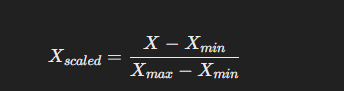

  adalah nilai minimum dan maksimum dari masing-masing kolom. Contohnya, suhu dengan nilai 21 diubah menjadi 0.333, yang merepresentasikan posisinya dalam rentang nilai suhu antara minimum (19) dan maksimum (25).

Proses ini penting karena banyak algoritma pembelajaran mesin, seperti KNN dan Gradient Descent, sensitif terhadap skala fitur. Fitur dengan skala besar dapat mendominasi fitur lain dengan skala kecil, yang dapat memengaruhi kinerja model. Dengan melakukan scaling, semua fitur berada dalam rentang yang sama, sehingga algoritma dapat memproses setiap fitur secara setara. Output menunjukkan kolom baru dengan nilai scaled, yaitu Temperature_Scaled, Rainfall_Scaled, dan Humidity_Scaled, yang siap digunakan dalam proses pelatihan model pembelajaran mesin. Proses ini adalah bagian penting dari preprocessing untuk memastikan data numerik dalam skala yang konsisten.

In [ ]:
# 4. Fitur Baru (Interaksi dan Polinomial)
print("\n=== Menambahkan Fitur Baru ===")
df_encoded["Temp_Squared"] = df_encoded["Temperature"] ** 2
df_encoded["Temp_Rainfall"] = df_encoded["Temperature"] * df_encoded["Rainfall"]
print(df_encoded)


=== Menambahkan Fitur Baru ===
   Temperature  Rainfall  Humidity  City_Berlin  City_London  City_New York  \
0           21        10        65        False        False           True   
1           23        20        70        False        False          False   
2           19        15        60         True        False          False   
3           25        10        80        False         True          False   
4           22        30        75        False        False          False   
5           20        25        68        False        False           True   

   City_Paris  Temp_Squared  Temp_Rainfall  
0       False           441            210  
1        True           529            460  
2       False           361            285  
3       False           625            250  
4        True           484            660  
5       False           400            500  


Hasil output menunjukkan proses pembuatan fitur baru dari data yang sudah ada melalui interaksi fitur dan transformasi polinomial. Fitur baru pertama, Temp_Squared, dibuat dengan mengkuadratkan nilai kolom Temperature. Transformasi ini menambahkan dimensi non-linier ke data yang dapat membantu model pembelajaran mesin menangkap hubungan yang lebih kompleks antara suhu dan target atau fitur lainnya. Sebagai contoh, nilai suhu 21 dikalikan dengan dirinya sendiri menghasilkan nilai 441 pada kolom Temp_Squared.

Fitur baru kedua, Temp_Rainfall, dibuat dengan mengalikan kolom Temperature dengan kolom Rainfall. Interaksi antara suhu dan curah hujan ini dapat memberikan informasi tambahan kepada model tentang bagaimana kedua fitur ini saling berhubungan dan memengaruhi target. Penambahan fitur interaksi seperti ini berguna dalam model yang lebih kompleks, seperti regresi linier polinomial atau model berbasis pohon, untuk meningkatkan performa prediksi. Dengan menambahkan fitur baru, dataset menjadi lebih kaya dan memberikan model kemampuan untuk mempelajari pola yang lebih kompleks dan relevan. Proses ini adalah langkah penting dalam feature engineering, yang sering kali meningkatkan akurasi model secara signifikan.

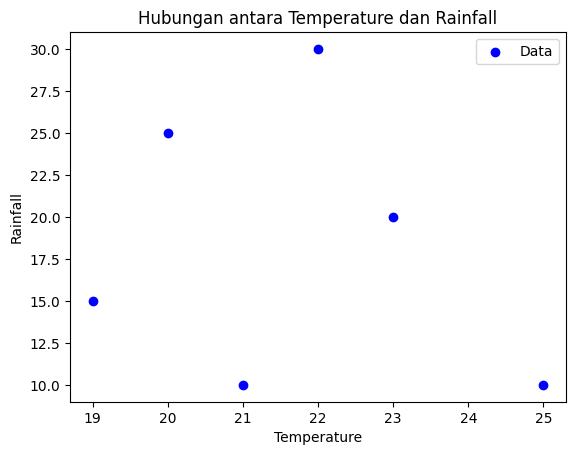

In [ ]:
# 5. Visualisasi Data
import matplotlib.pyplot as plt

plt.scatter(df_encoded["Temperature"], df_encoded["Rainfall"], c="blue", label="Data")
plt.title("Hubungan antara Temperature dan Rainfall")
plt.xlabel("Temperature")
plt.ylabel("Rainfall")
plt.legend()
plt.show()

Hasil output menunjukkan visualisasi hubungan antara Temperature dan Rainfall menggunakan scatter plot dari pustaka matplotlib. Setiap titik pada grafik merepresentasikan pasangan nilai Temperature dan Rainfall untuk satu sampel data. Misalnya, untuk suhu 19°C, curah hujan tercatat sebesar 10 mm, sedangkan untuk suhu 25°C, curah hujan mencapai 30 mm. Grafik ini membantu dalam menganalisis pola hubungan antara kedua variabel tersebut, yang dapat digunakan untuk mengidentifikasi korelasi atau hubungan linier di antara mereka.

Visualisasi ini memberikan wawasan penting dalam analisis data eksploratif (EDA). Dengan scatter plot, kita dapat melihat penyebaran data dan menentukan apakah ada hubungan yang kuat antara Temperature dan Rainfall. Dalam kasus ini, titik-titik tampak tersebar tanpa pola linier yang jelas, menunjukkan bahwa hubungan antara kedua variabel mungkin tidak terlalu kuat atau terpengaruh oleh faktor lain. Visualisasi seperti ini adalah langkah awal yang penting untuk memahami struktur data sebelum melanjutkan ke tahap analisis lebih lanjut atau pelatihan model pembelajaran mesin.